<a href="https://colab.research.google.com/github/Ri05/Rainfall_Prediction-ML_Model/blob/main/Rainfall_Prediction_ML_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Sydney_Rain Prediction File**

In [1]:
import numpy as np # Importing the NumPy library for numerical operations.
import pandas as pd # Importing the Pandas library for data manipulation and analysis.
import seaborn as sns # Importing the Seaborn library for statistical data visualization.
import matplotlib.pyplot as plt # Importing the Matplotlib library for creating static, animated, and interactive visualizations.

In [2]:
from google.colab import files # This code allows you to upload files from your local machine to the Colab environment.
uploaded =files.upload() # It's useful when you need to work with datasets or other files that are not already available in Colab.

Saving sydney_rain prediction.xlsx to sydney_rain prediction.xlsx


In [3]:
df = pd.read_excel('sydney_rain prediction.xlsx') # Read the Excel file 'sydney_rain prediction.xlsx' into a Pandas DataFrame called 'df'.

# **Data Preprocessing**

It is used for :
- **Data Cleaning**: Handling missing values, remove duplicates, and correct errors.
- **Data Transformation**: Converting categorical variables into numerical ones and normalize or standardize numerical features.
- **Feature Engineering**: Creating new features from existing ones to enhance predictive power.
- **Handling Imbalance**: Addressing class imbalance using techniques like oversampling, undersampling, or synthetic sample generation.
- **Improving Model Performance**: Scaling features to meet model assumptions and improve stability and accuracy.
- **Enhancing Data Quality**: Reducing noise and ensure consistency in the dataset.

In [4]:
df.head() # displays the first 5 rows of the DataFrame 'df'.

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-02-01,Sydney,19.5,22.4,15.6,6.2,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,Yes,Yes
1,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
2,2008-02-03,Sydney,21.6,24.5,6.6,2.4,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,Yes,Yes
3,2008-02-04,Sydney,20.2,22.8,18.8,2.2,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,Yes,Yes
4,2008-02-05,Sydney,19.7,25.7,77.4,NaN,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,Yes,Yes


In [5]:
df.describe() #provides descriptive statistics of the DataFrame 'df'

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3334.000000,3335.000000,3331.000000,3286.000000,3321.000000,3323.000000,3324.000000,3317.000000,3318.000000,2771.000000,2776.000000,3333.000000,3333.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.700000,1011.300000,1.000000,1.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.300000,69.000000,56.000000,1018.600000,1016.300000,5.000000,4.000000,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,65.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.553641,4.494638,9.895172,2.777407,3.810886,15.085355,16.293530,7.021571,7.032211,2.749578,2.641885,4.897177,4.303737


In [6]:
df.info() # This line provides a concise summary of the DataFrame 'df'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3334 non-null   float64       
 3   MaxTemp       3335 non-null   float64       
 4   Rainfall      3331 non-null   float64       
 5   Evaporation   3286 non-null   float64       
 6   Sunshine      3321 non-null   float64       
 7   Humidity9am   3323 non-null   float64       
 8   Humidity3pm   3324 non-null   float64       
 9   Pressure9am   3317 non-null   float64       
 10  Pressure3pm   3318 non-null   float64       
 11  Cloud9am      2771 non-null   float64       
 12  Cloud3pm      2776 non-null   float64       
 13  Temp9am       3333 non-null   float64       
 14  Temp3pm       3333 non-null   float64       
 15  RainToday     3331 non-null   object  

# **Treatment Of Missing Values**

It is used for:
- **Prevents Bias**: Missing values can introduce bias in models, leading to inaccurate predictions. Treating them helps maintain data consistency.
- **Improves Model Performance**: Handling missing values reduces the risk of errors and improves the reliability of statistical models and machine learning algorithms.
- **Enhances Data Quality**: It ensures that the dataset is complete and reliable, which is crucial for drawing meaningful insights and making informed decisions.

In [7]:
df['MinTemp'].fillna(value = df['MinTemp'].mean(),inplace=True) # Fill missing values in the 'MinTemp' column with the mean of 'MinTemp'
df['MaxTemp'].fillna(value = df['MaxTemp'].mean(),inplace=True) # Fill missing values in the 'MaxTemp' column with the mean of 'MaxTemp'
df['Rainfall'].fillna(value = df['Rainfall'].mean(),inplace=True) # Fill missing values in the 'Rainfall' column with the mean of 'Rainfall'
df['Date'].fillna(value = df['Date'].mean(),inplace=True) # Fill missing values in the 'Date' column with the mean of 'Date'
df['Evaporation'].fillna(value = df['Evaporation'].mean(),inplace=True) # Fill missing values in the 'Evaporation' column with the mean of 'Evaporation'
df['Sunshine'].fillna(value = df['Sunshine'].mean(),inplace=True) # Fill missing values in the 'Sunshine' column with the mean of 'Sunshine'
df['Humidity9am'].fillna(value = df['Humidity9am'].mean(),inplace=True) # Fill missing values in the 'Humidity9am' column with the mean of ''Humidity9am
df['Pressure9am'].fillna(value = df['Pressure9am'].mean(),inplace=True) # Fill missing values in the 'Pressure9am' column with the mean of 'Pressure9am'
df['Humidity3pm'].fillna(value = df['Humidity3pm'].mean(),inplace=True) # Fill missing values in the 'Humidity3pm' column with the mean of 'Humidity3pm'
df['Pressure3pm'].fillna(value = df['Pressure3pm'].mean(),inplace=True) # Fill missing values in the 'Pressure3pm' column with the mean of 'Pressure3pm'
df['Cloud3pm'].fillna(value = df['Cloud3pm'].mean(),inplace=True) # Fill missing values in the 'Cloud3pm' column with the mean of 'Cloud3pm'
df['Cloud9am'].fillna(value = df['Cloud9am'].mean(),inplace=True) # Fill missing values in the 'Cloud9am' column with the mean of 'Cloud9am'
df['Temp9am'].fillna(value = df['Temp9am'].mean(),inplace=True) # Fill missing values in the 'Temp9am' column with the mean of 'Temp9am'
df['Temp3pm'].fillna(value = df['Temp3pm'].mean(),inplace=True) # Fill missing values in the 'Temp3pm' column with the mean of 'Temp3pm'
df['RainToday'].fillna(value = df['RainToday'].mode()[0],inplace=True)# For categorical or binary columns like 'RainToday', it's better to fill missing values using mode (most frequent value) rather than mean.

<ipython-input-7-c38ff2281d91>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MinTemp'].fillna(value = df['MinTemp'].mean(),inplace=True) #intended to fill missing values
<ipython-input-7-c38ff2281d91>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing '

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          3337 non-null   datetime64[ns]
 1   Location      3337 non-null   object        
 2   MinTemp       3337 non-null   float64       
 3   MaxTemp       3337 non-null   float64       
 4   Rainfall      3337 non-null   float64       
 5   Evaporation   3337 non-null   float64       
 6   Sunshine      3337 non-null   float64       
 7   Humidity9am   3337 non-null   float64       
 8   Humidity3pm   3337 non-null   float64       
 9   Pressure9am   3337 non-null   float64       
 10  Pressure3pm   3337 non-null   float64       
 11  Cloud9am      3337 non-null   float64       
 12  Cloud3pm      3337 non-null   float64       
 13  Temp9am       3337 non-null   float64       
 14  Temp3pm       3337 non-null   float64       
 15  RainToday     3337 non-null   object  

In [9]:
df.describe()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,3337,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,2012-10-16 01:24:34.737788672,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333
min,2008-02-01 00:00:00,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000
25%,2010-05-15 00:00:00,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000
50%,2012-09-28 00:00:00,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000
75%,2015-03-14 00:00:00,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000
max,2017-06-25 00:00:00,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000
std,NaN,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156


# **Dummy variables**

It is used for :
- **Categorical Variable Encoding**: They allow categorical variables to be included in statistical models and machine learning algorithms that require numerical input. This is crucial because many models cannot handle non-numerical data directly.
- **Avoiding Ordinal Assumptions**: By converting categorical variables into dummy variables, you avoid implying an ordinal relationship where none exists. This ensures that the model treats categories as distinct and not inherently ordered.
- **Improving Model Interpretability**: Dummy variables make it easier to interpret the effects of categorical variables on the outcome variable, as each category can be analyzed separately.

In [10]:
df= pd.get_dummies(df,columns = ["RainToday","RainTomorrow",], drop_first = True) #This drops the first dummy variable for each categorical feature.

In [11]:
df= pd.get_dummies(df,columns = ["Location"]) #creates dummy variables for categorical features

In [12]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,True,True,True
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,True,True,True
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,True,True,True
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,True,True,True
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,True,True,True


**Changing Data Type**

In [13]:
df['RainToday_Yes'] = df['RainToday_Yes'].astype(int) #removes above true false value with 1,0
df['RainTomorrow_Yes'] = df['RainTomorrow_Yes'].astype(int)
df['Location_Sydney'] = df['Location_Sydney'].astype(int)
df.head()


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney
0,2008-02-01,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,1
1,2008-02-02,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,1
2,2008-02-03,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,1
3,2008-02-04,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,1
4,2008-02-05,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1


**Converting Date Column to Datetime Format and Extracting Year, Month, and Day Features**

In [14]:
import pandas as pd
if not isinstance(df['Date'].dtype, pd.api.types.DatetimeTZDtype):  # Check if 'Date' is already in datetime format
    df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' to datetime format if it's not already
df['Year'] = df['Date'].dt.year # Extract relevant features from the Date column
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(columns=['Date'], inplace=True) # Drop the original Date column if no longer needed
print(df.head())

   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
0     19.5     22.4      15.6     6.200000       0.0         92.0   
1     19.5     25.6       6.0     3.400000       2.7         83.0   
2     21.6     24.5       6.6     2.400000       0.1         88.0   
3     20.2     22.8      18.8     2.200000       0.0         83.0   
4     19.7     25.7      77.4     5.187432       0.0         88.0   

   Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
0         84.0       1017.6       1017.4       8.0       8.0     20.7   
1         73.0       1017.9       1016.4       7.0       7.0     22.4   
2         86.0       1016.7       1015.6       7.0       8.0     23.5   
3         90.0       1014.2       1011.8       8.0       8.0     21.4   
4         74.0       1008.3       1004.8       8.0       8.0     22.5   

   Temp3pm  RainToday_Yes  RainTomorrow_Yes  Location_Sydney  Year  Month  Day  
0     20.9              1                 1                1  200

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MinTemp           3337 non-null   float64
 1   MaxTemp           3337 non-null   float64
 2   Rainfall          3337 non-null   float64
 3   Evaporation       3337 non-null   float64
 4   Sunshine          3337 non-null   float64
 5   Humidity9am       3337 non-null   float64
 6   Humidity3pm       3337 non-null   float64
 7   Pressure9am       3337 non-null   float64
 8   Pressure3pm       3337 non-null   float64
 9   Cloud9am          3337 non-null   float64
 10  Cloud3pm          3337 non-null   float64
 11  Temp9am           3337 non-null   float64
 12  Temp3pm           3337 non-null   float64
 13  RainToday_Yes     3337 non-null   int64  
 14  RainTomorrow_Yes  3337 non-null   int64  
 15  Location_Sydney   3337 non-null   int64  
 16  Year              3337 non-null   int32  


In [16]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney,Year,Month,Day
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,1,2008,2,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,1,2008,2,2
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,1,2008,2,3
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,1,2008,2,4
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,1,2008,2,5


In [17]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney,Year,Month,Day
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.0,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215,1.0,2012.300869,6.413545,15.705424
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269,0.0,2.761933,3.397846,8.795802
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000,1.0,2008.000000,1.000000,1.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000,1.0,2010.000000,3.000000,8.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000,1.0,2012.000000,6.000000,16.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000,1.0,2015.000000,9.000000,23.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000,1.0,2017.000000,12.000000,31.000000


# **Data Visualization**

- **Insight into Class Distribution**: Visualizations help understand the distribution of classes, identifying potential imbalances or outliers.
- **Feature Importance**: Plots like feature importance or partial dependence plots reveal which features contribute most to classification decisions.
- **Model Performance Evaluation**: Confusion matrices, ROC curves, and precision-recall curves assess model accuracy, precision, recall, and F1 score.

In [18]:
import seaborn as sns # Library for data visualization

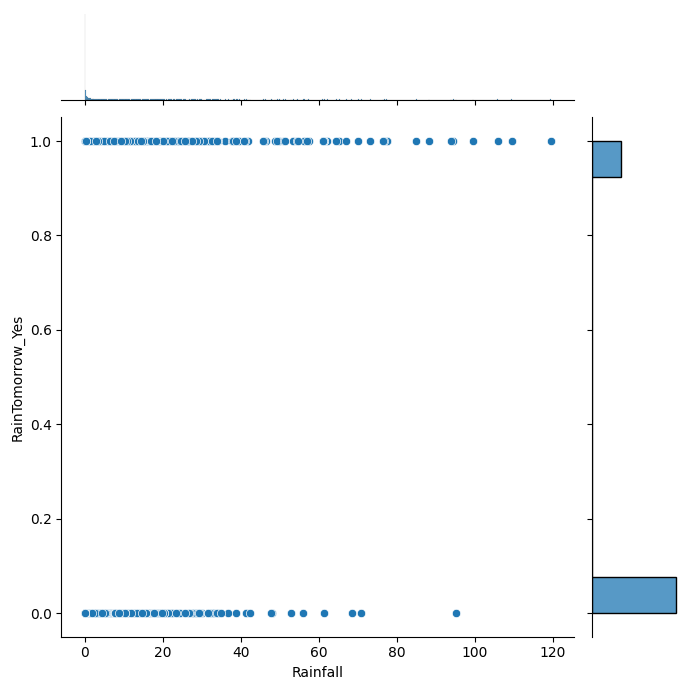

In [19]:
import matplotlib.pyplot as plt # Import Matplotlib for creating static, animated, and interactive visualizations
sns.jointplot(x='Rainfall', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Creating a joint plot to visualize the relationship between 'Rainfall' and 'RainTomorrow_Yes'
plt.show() # Displaying the plot

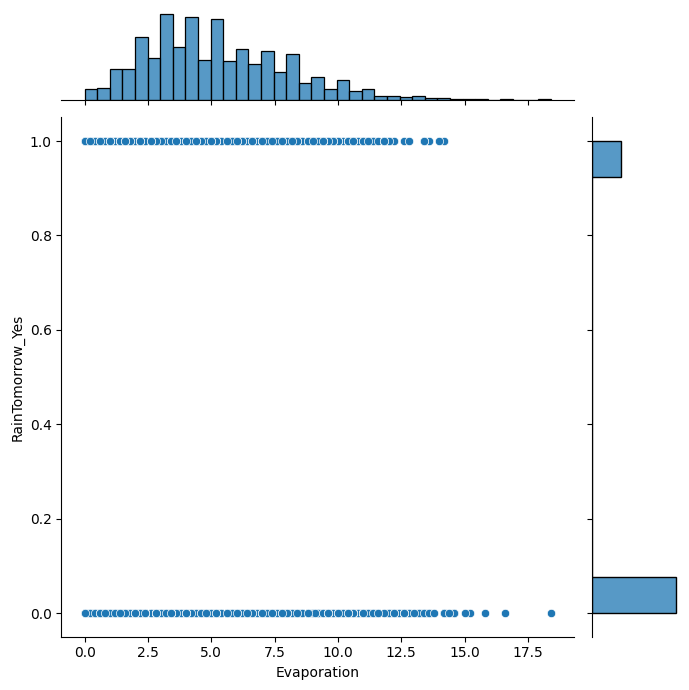

In [20]:
sns.jointplot(x='Evaporation', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'Evaporation' and 'RainTomorrow_Yes'

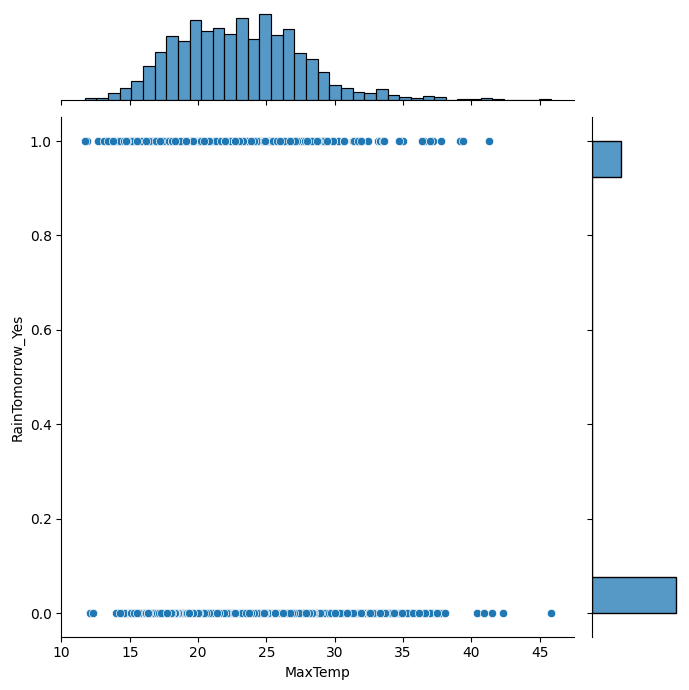

In [21]:
sns.jointplot(x='MaxTemp', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'MaxTemp' and 'RainTomorrow_Yes'

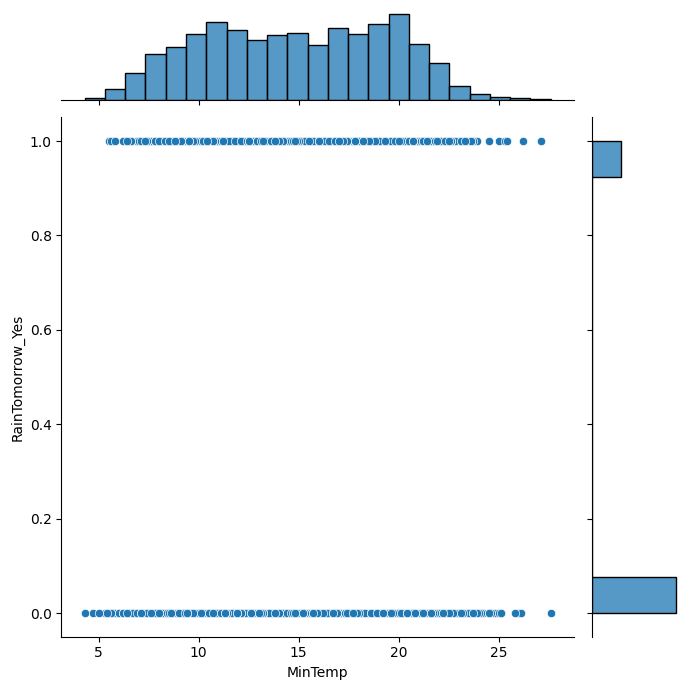

In [22]:
sns.jointplot(x='MinTemp', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'MinTemp' and 'RainTomorrow_Yes'

# **OBSERVATION REGARDING THE DATA Preprocessing**


	1.	No Missing Values
	•	There are no missing values in the dataset, as we have already handled them during the data-cleaning process. Appropriate imputation techniques or removal of null entries were applied to ensure the data is complete for further analysis.
	2.	Outliers
	•	Outliers were identified in the following columns:
	•	Rainfall
	•	Maximum Temperature
	•	Minimum Temperature
	•	Evaporation
	•	These outliers were treated using the IQR-based method, where values exceeding the upper bound (calculated as ￼) were capped at the upper bound. This ensures that extreme values do not distort the results while retaining meaningful variability in the data.
	3.	Skewness
	•	The dataset exhibited skewness in several key numerical variables:
	•	Rainfall
	•	Maximum Temperature
	•	Minimum Temperature
	•	Evaporation
	•	To address this, log transformations or other normalization techniques were applied, reducing skewness and making the data more normally distributed, which improves the performance and stability of the machine learning models.

# **Skewness Treatment**

- **Log Transformation**: Reduces skewness in positively skewed data by applying a logarithmic transformation.
- **Box-Cox Transformation**: Stabilizes variance and reduces skewness using a power transformation.
- **Standardization/Normalization**: Helps reduce the impact of skewness on model performance by scaling or normalizing data.

In [23]:
df['Rainfall'] = np.log(1+df['Rainfall']) # Applying log transformation to 'Rainfall'

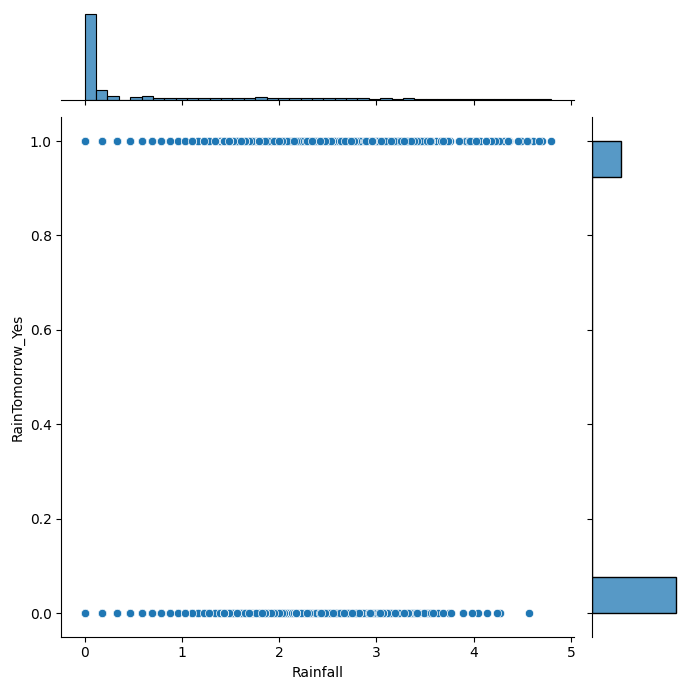

In [24]:
sns.jointplot(x='Rainfall', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'Rainfall' and 'RainTomorrow_Yes'

In [25]:
df['MaxTemp'] = np.log(1+df['MaxTemp']) # Applying log transformation to 'MaxTemp'

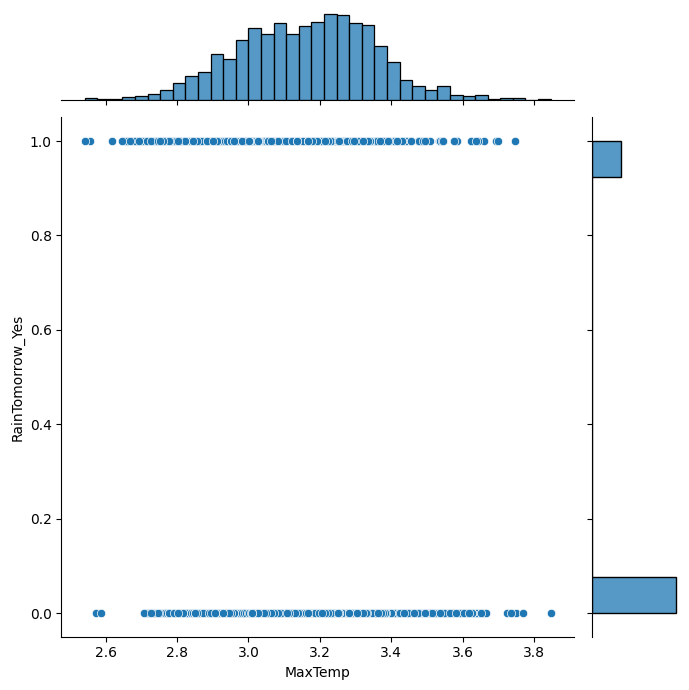

In [26]:
sns.jointplot(x='MaxTemp', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'MaxTemp' and 'RainTomorrow_Yes'

In [27]:
df['MinTemp'] = np.log(1+df['MinTemp']) # Applying log transformation to 'MinTemp'

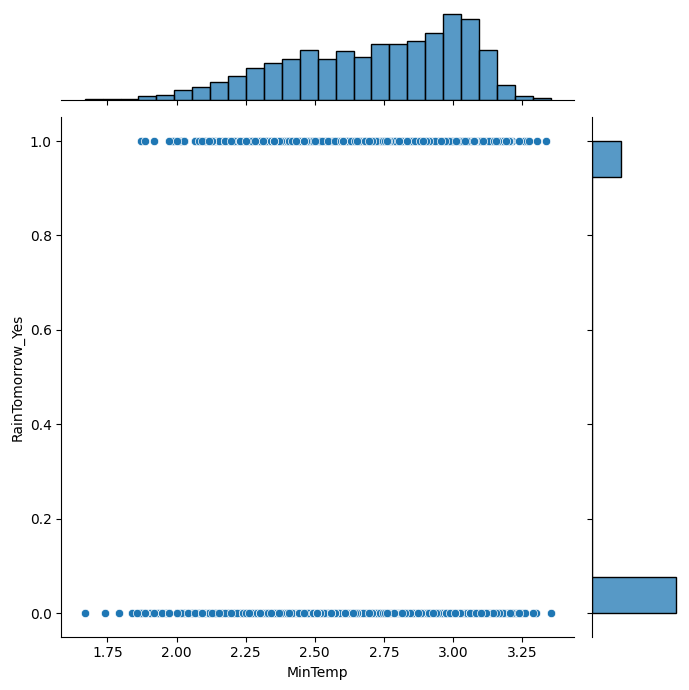

In [28]:
sns.jointplot(x='MinTemp', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'MinTemp' and 'RainTomorrow_Yes'

In [29]:
df['Evaporation'] = np.log(1+df['Evaporation']) # Applying log transformation to 'Evaporation'

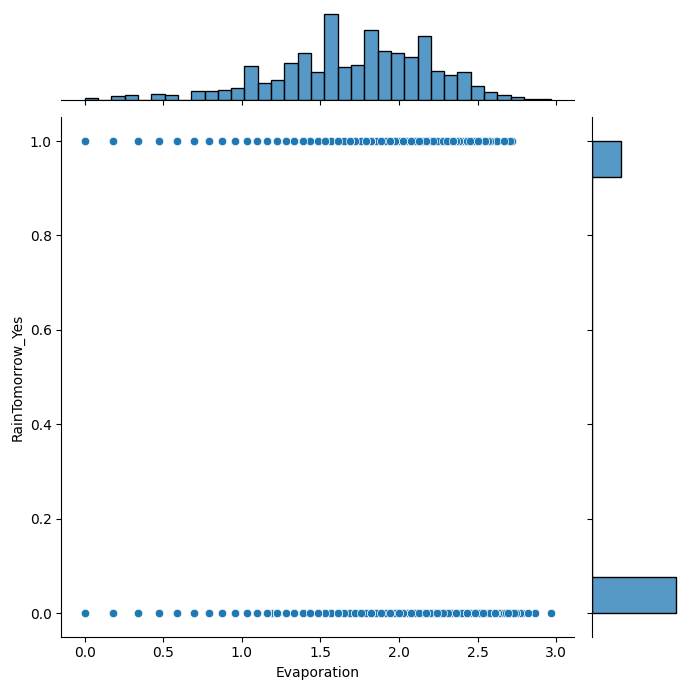

In [30]:
sns.jointplot(x='Evaporation', y='RainTomorrow_Yes', data=df, kind='scatter', height=7) # Create a joint plot to visualize the relationship between 'Evaporation' and 'RainTomorrow_Yes'

# **Outlier Treatment**

In [31]:
import numpy as np # Import the NumPy library for numerical operations
np.percentile(df.Rainfall,[99]) # Calculate the 99th percentile of the 'Rainfall' column in the DataFrame

array([3.97578139])

In [32]:
np.percentile(df.Rainfall,[99])[0] # Calculate the 99th percentile of the 'Rainfall' column in the DataFrame

3.975781391865068

In [33]:
uv=np.percentile(df.Rainfall,[99])[0] # - [99]: This specifies that we want to calculate the 99th percentile.
# - [0]: This indexes into the result array to get the single value, since np.percentile returns an array even for a single percentile.

In [34]:
df[(df.Rainfall>uv)] # Filter the DataFrame to include only rows where 'Rainfall' is greater than the 99th percentile (uv)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney,Year,Month,Day
4,3.030134,3.284664,4.361824,1.822520,0.000000,88.0,74.0,1008.3,1004.8,8.000000,8.00000,22.5,25.5,1,1,1,2008,2,5
218,2.549445,2.721295,4.146304,1.822520,0.000000,92.0,88.0,1014.8,1013.1,8.000000,8.00000,13.0,12.3,1,1,1,2008,9,6
633,2.734368,2.890372,4.306764,1.822520,0.000000,91.0,60.0,1023.7,1025.3,8.000000,8.00000,14.7,16.6,1,1,1,2009,10,26
737,3.054001,3.258097,4.361824,2.128232,0.200000,95.0,86.0,1021.6,1020.8,7.000000,8.00000,21.1,23.8,1,1,1,2010,2,7
743,3.109061,3.277145,4.262680,2.341806,0.300000,92.0,80.0,1011.9,1010.2,8.000000,8.00000,22.1,25.2,1,1,1,2010,2,13
855,2.602690,3.068053,4.133565,0.693147,4.400000,80.0,67.0,1014.2,1012.0,5.000000,7.00000,13.5,17.4,1,0,1,2010,6,5
1140,2.985682,3.198673,4.609162,1.822520,3.300000,92.0,81.0,1012.4,1010.1,4.181523,4.21866,19.4,22.2,1,1,1,2011,3,20
1182,2.701361,3.039749,4.192680,1.822520,0.700000,81.0,62.0,1019.5,1019.3,4.181523,4.21866,17.9,19.6,1,1,1,2011,5,31
1232,2.272126,2.970414,4.354141,1.822520,1.600000,91.0,83.0,1012.7,1013.5,4.181523,4.21866,14.3,15.0,1,1,1,2011,7,20
1234,2.509599,2.701361,4.490881,1.822520,0.000000,88.0,95.0,1018.3,1018.0,4.181523,4.21866,13.1,11.5,1,1,1,2011,7,22


In [35]:
df.Rainfall[(df.Rainfall> 3*uv)]=3*uv  # Cap Rainfall values that are greater than 3 times the 99th percentile (uv) to 3 times uv

<ipython-input-35-136a0d96febe>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df.Rainfall[(df.Rainfall> 3*uv)]=3*uv  # Cap Rainfall values that are greater than 3 times the 99th percentile (uv) to 3 times uv
<ipython-input-35-136a0d96febe

In [36]:
df.describe() # performing EDD

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,RainTomorrow_Yes,Location_Sydney,Year,Month,Day
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.0,3337.000000,3337.000000,3337.000000
mean,2.718836,3.160815,0.603253,1.715154,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.259515,0.259215,1.0,2012.300869,6.413545,15.705424
std,0.309724,0.186514,1.035078,0.484009,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.438434,0.438269,0.0,2.761933,3.397846,8.795802
min,1.667707,2.541602,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000,1.0,2008.000000,1.000000,1.000000
25%,2.484907,3.025291,0.000000,1.435085,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000,1.0,2010.000000,3.000000,8.000000
50%,2.766319,3.169686,0.000000,1.757858,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000,1.0,2012.000000,6.000000,16.000000
75%,2.980619,3.295837,0.875469,2.079442,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,1.000000,1.000000,1.0,2015.000000,9.000000,23.000000
max,3.353407,3.845883,4.790820,2.965273,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,1.000000,1.000000,1.0,2017.000000,12.000000,31.000000


# **X-y Split**

In [38]:
X = df.loc[:, df.columns != 'RainTomorrow_Yes'] # This line creates a new DataFrame X by selecting all columns from the DataFrame df except for the 'RainTomorrow_Yes' column.
type(X)

pandas.core.frame.DataFrame

In [39]:
X.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,Location_Sydney,Year,Month,Day
0,3.020425,3.152736,2.809403,1.974081,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,2008,2,1
1,3.020425,3.280911,1.945910,1.481605,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,2008,2,2
2,3.117950,3.238678,2.028148,1.223775,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,2008,2,3
3,3.054001,3.169686,2.985682,1.163151,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,2008,2,4
4,3.030134,3.284664,4.361824,1.822520,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,2008,2,5


In [40]:
X.shape

(3337, 18)

In [41]:
y= df['RainTomorrow_Yes'] # This line creates a new DataFrame y by selecting only the 'RainTomorrow_Yes' column from the DataFrame df.
type(y)

pandas.core.series.Series

In [42]:
y.shape

(3337,)

# **HOW TO TEST AND TRAIN OUR MODAL SELECTION**

### Testing and Training Model Selection

To test and train your model effectively, here are the key steps and their uses:

#### Split Data
- **Prevents Overfitting**: Splits your dataset into training and testing sets to ensure the model is not overfitting to the training data.

#### Train Model
- **Model Development**: Trains the model using the training data to learn patterns and relationships.

#### Evaluate Model
- **Assesses Generalization**: Evaluates the model's performance on the test data to see how well it generalizes to new, unseen data.

### Uses

- **Prevents Overfitting**: Ensures that the model is not overly specialized to the training data.
- **Assesses Generalization**: Tests how well the model performs on new, unseen data.
- **Hyperparameter Tuning**: Allows for tuning hyperparameters using cross-validation to find optimal settings.
- **Model Comparison**: Enables comparison of different models to select the best one based on their performance on test data.

In [43]:
from sklearn.model_selection import train_test_split # Import the train_test_split function for splitting the data into training and testing sets.

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) # Split the data into training and testing sets.

In [45]:
X_train.head() # Display the first few rows of the training data.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,Location_Sydney,Year,Month,Day
245,3.157000,3.577948,0.000000,2.261763,9.8,41.0,20.0,1014.8,1010.300,1.0,7.0,29.6,33.9,0,1,2008,10,3
2258,2.028148,3.104587,0.000000,1.280934,9.4,49.0,22.0,1007.6,999.600,0.0,1.0,11.9,20.7,0,1,2014,7,9
242,2.557227,3.005683,0.587787,2.001480,11.1,61.0,48.0,1020.3,1016.777,2.0,1.0,16.5,19.0,0,1,2008,9,30
2747,2.928524,3.049273,2.954910,2.302585,0.0,81.0,70.0,1014.4,1013.400,8.0,8.0,18.7,18.9,1,1,2015,11,14
2982,2.351375,2.928524,0.182322,1.686399,4.8,54.0,47.0,1004.0,1003.000,6.0,6.0,12.9,15.9,0,1,2016,7,6


In [46]:
X_train.shape # Display the shape of the training data.

(2669, 18)

In [47]:
X_test.shape # Display the shape of the testing data.

(668, 18)

# **Logistic Regression**

### Uses of Logistic Regression

- **Binary Classification**: Predicts binary outcomes (e.g., 0/1, yes/no) based on input features.
- **Feature Interpretability**: Provides coefficients and odds ratios to understand feature impact on the positive class.
- **Model Evaluation**: Evaluates performance using accuracy, precision, recall, and F1 score; also uses ROC curves.
- **Efficient Implementation**: Computationally efficient and easy to implement and interpret.

In [48]:
from sklearn.linear_model import LogisticRegression # Import the LogisticRegression class from scikit-learn for logistic regression.

In [49]:
clf_lrs =LogisticRegression() # Initialize a Logistic Regression model.

In [50]:
clf_lrs.fit(X,y) # Fit the model to the entire dataset.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
clf_lrs.coef_ # Display the coefficients of the logistic regression model.

array([[-6.98635454e-03, -2.31912003e-03,  1.55783842e-01,
         1.74013343e-02, -1.95426199e-01,  7.57099761e-03,
         4.43302420e-02, -8.45618289e-02,  6.30677743e-02,
        -5.95991772e-02,  1.47350034e-01,  1.46909659e-02,
        -4.18686483e-02,  6.27062872e-02, -3.70678494e-05,
         9.40023573e-03, -3.09337856e-04,  1.20135763e-02]])

In [52]:
clf_lrs.intercept_ # Display the intercept of the logistic regression model.

array([-3.707198e-05])

In [53]:
import statsmodels.api as sn # Import the statsmodels library for statistical modeling.

In [54]:
X_cons = sn.add_constant(X) #This line prepares the data for regression analysis using `statsmodels` by adding a constant term

In [55]:
X_cons.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_Yes,Location_Sydney,Year,Month,Day
0,3.020425,3.152736,2.809403,1.974081,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,1,1,2008,2,1
1,3.020425,3.280911,1.945910,1.481605,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,1,1,2008,2,2
2,3.117950,3.238678,2.028148,1.223775,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,1,1,2008,2,3
3,3.054001,3.169686,2.985682,1.163151,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,1,1,2008,2,4
4,3.030134,3.284664,4.361824,1.822520,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,1,1,2008,2,5


In [56]:
import statsmodels.discrete.discrete_model as sm # Import the discrete_model module from statsmodels for logistic regression.

In [57]:
logit = sm.Logit(y,X_cons).fit() # Fit a logistic regression model using the 'Logit' class from 'statsmodels'.

Optimization terminated successfully.
         Current function value: 0.379697
         Iterations 7


In [58]:
logit.summary() # Display the summary of the logistic regression model.

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       RainTomorrow_Yes   No. Observations:                 3337
Model:                          Logit   Df Residuals:                     3319
Method:                           MLE   Df Model:                           17
Date:                Sun, 20 Oct 2024   Pseudo R-squ.:                  0.3365
Time:                        13:10:22   Log-Likelihood:                -1267.0
converged:                       True   LL-Null:                       -1909.5
Covariance Type:            nonrobust   LLR p-value:                7.666e-263
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
MinTemp            -3.3907      0.633     -5.359      0.000      -4.631      -2.151
MaxTemp            -0.2521      1.034     -0.244      0.807      -2.278       1.774
Rainfall            0.2607      0.098      2.671      0.008       0.069       0.452
Evaporation         0.4926      0.142      3.457      0.001       0.213       0.772
Sunshine           -0.2177      0.023     -9.503      0.000      -0.263      -0.173
Humidity9am         0.0146      0.007      2.081      0.037       0.001       0.028
Humidity3pm         0.0515      0.007      7.477      0.000       0.038       0.065
Pressure9am        -0.0960      0.031     -3.128      0.002      -0.156      -0.036
Pressure3pm         0.0605      0.030      2.024      0.043       0.002       0.119
Cloud9am           -0.0910      0.031     -2.969      0.003      -0.151      -0.031
Cloud3pm            0.1541      0.032      4.825      0.000       0.092       0.217
Temp9am             0.1535      0.050      3.057      0.002       0.055       0.252
Temp3pm             0.0226      0.050      0.451      0.652      -0.076       0.121
RainToday_Yes       0.3703      0.223      1.664      0.096      -0.066       0.806
Location_Sydney   -36.7142     37.897     -0.969      0.333    -110.992      37.563
Year                0.0371      0.019      1.975      0.048       0.000       0.074
Month              -0.0015      0.016     -0.093      0.926      -0.033       0.030
Day                -0.0047      0.006     -0.820      0.412      -0.016       0.007
===================================================================================
"""

In [59]:
clf_lrs.predict_proba(X) # Predict the probability of each class for the input data X using the fitted logistic regression model.

array([[0.11307972, 0.88692028],
       [0.37043112, 0.62956888],
       [0.12322131, 0.87677869],
       ...,
       [0.6280173 , 0.3719827 ],
       [0.96176815, 0.03823185],
       [0.96303967, 0.03696033]])

In [60]:
y_pred =clf_lrs.predict(X) # Predict the class labels for the input data X using the fitted logistic regression model.
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [61]:
y_pred_03 = (clf_lrs.predict_proba(X)[:,1]>=0.3) # Predict the class labels with a threshold of 0.3 for the input data X using the fitted logistic regression model.
y_pred_03

array([ True,  True,  True, ...,  True, False, False])

In [62]:
from sklearn.metrics import confusion_matrix # Importing the confusion_matrix function from scikit-learn for evaluating classification models.
confusion_matrix (y,y_pred)

array([[2277,  195],
       [ 386,  479]])

In [63]:
confusion_matrix(y, y_pred_03) # Displaying the confusion matrix for the predictions with a threshold of 0.3.

array([[2051,  421],
       [ 243,  622]])

In [64]:
from sklearn.metrics import precision_score, recall_score # Importing the precision_score and recall_score functions from scikit-learn for evaluating classification models.

In [65]:
precision_score(y,y_pred) # Calculating and displaying the precision score for the predictions.

0.7106824925816023

In [66]:
recall_score(y,y_pred) # Calculating the recall score for a binary classification model.

0.553757225433526

In [67]:
from sklearn.metrics import roc_auc_score # Importing the roc_auc_score function from scikit-learn for evaluating classification models.

In [68]:
roc_auc_score(y, y_pred) # Calculating and displaying the area under the receiver operating characteristic curve (AUC-ROC) for the predictions.

0.7374368651439475

In [ ]:
coefficients = clf_lrs.coef_[0] # Get the coefficients from the logistic regression model
feature_names = X.columns # Get the feature names
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients}) # Create a DataFrame with feature names and coefficients
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs() # Calculate the absolute value of the coefficients
coefficients_df = coefficients_df.sort_values('Abs_Coefficient', ascending=False) # Sort the DataFrame by the absolute value of the coefficients in descending order
print(coefficients_df) # Display the results


            Feature  Coefficient  Abs_Coefficient
2          Rainfall     0.206141         0.206141
4          Sunshine    -0.204196         0.204196
10         Cloud3pm     0.168712         0.168712
7       Pressure9am    -0.110938         0.110938
9          Cloud9am    -0.104213         0.104213
13    RainToday_Yes     0.083032         0.083032
8       Pressure3pm     0.072047         0.072047
12          Temp3pm    -0.049220         0.049220
6       Humidity3pm     0.041744         0.041744
3       Evaporation     0.022851         0.022851
15             Year     0.018437         0.018437
16            Month     0.012257         0.012257
5       Humidity9am     0.011502         0.011502
11          Temp9am     0.011210         0.011210
0           MinTemp    -0.010722         0.010722
17              Day    -0.009295         0.009295
1           MaxTemp    -0.002757         0.002757
14  Location_Sydney    -0.000046         0.000046


# **Linear Dicriminant Analysis**

### Uses of Linear Discriminant Analysis (LDA)

- **Dimensionality Reduction**: Reduces the number of features while retaining most of the information, making it easier to visualize and analyze data.
- **Classification**: Effective for binary or multi-class classification problems by finding a linear combination of features that characterizes or separates classes.
- **Feature Selection**: Helps in selecting the most informative features that contribute to class separation.
- **Data Visualization**: Simplifies high-dimensional data into lower dimensions, facilitating better visualization and understanding of class relationships.

These uses make LDA a valuable tool in various applications such as image recognition, text classification, and medical diagnosis.

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Importing the LinearDiscriminantAnalysis class from scikit-learn for linear discriminant analysis.

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
clf_lda = LinearDiscriminantAnalysis() # This code trains a Linear Discriminant Analysis (LDA) model.
clf_lda.fit(X,y)

LinearDiscriminantAnalysis()

In [ ]:
y_pred_lda = clf_lda.predict(X) # Predicting the class labels for the input data X using the fitted LDA model.
y_pred_lda

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
confusion_matrix(y,y_pred_lda) # This line calculates and displays the confusion matrix for the predictions made by the Linear Discriminant Analysis (LDA) model.

array([[2266,  206],
       [ 360,  505]])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Splitting the data into training and testing sets using train_test_split. This ensures that the model is evaluated on unseen data.

# Initialize and train the LDA model using the training data
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X_train, y_train) # Training the LDA model on the training data.

# Make predictions on the test set
y_pred_lda = clf_lda.predict(X_test) # Predicting on the test data to evaluate the model's performance on unseen data.


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lda))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lda))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lda))

Accuracy: 0.8188622754491018

Confusion Matrix:
 [[444  40]
 [ 81 103]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       484
           1       0.72      0.56      0.63       184

    accuracy                           0.82       668
   macro avg       0.78      0.74      0.76       668
weighted avg       0.81      0.82      0.81       668



In [ ]:
lda_model = LinearDiscriminantAnalysis() # Creating an instance of the LDA model
lda_model.fit(X_train, y_train) # Fitting the LDA model on the training data

print("\nLDA Coefficients:\n", lda_model.coef_) # Accessing the coefficients
print("\nLDA Intercept:\n", lda_model.intercept_) # Accessing the intercept


LDA Coefficients:
 [[-3.07442472e+00 -5.86332755e-01  5.11063354e-01  6.72541032e-01
  -3.35860500e-01  1.42995649e-03  6.78040055e-02 -1.23401722e-01
   7.30639000e-02 -1.01885673e-01  7.64113021e-02  7.45597833e-02
   8.93238540e-02  2.46760246e-01  2.39834457e-16  3.69792221e-02
   6.67538545e-03 -9.25547218e-03]]

LDA Intercept:
 [-20.48757827]


# **K- NEAREST NEIGHBORS**

### Uses of K-Nearest Neighbors (KNN)

- **Classification and Regression**: Effective for both classification and regression tasks by predicting the target variable based on the nearest neighbors.
- **Simple Implementation**: Easy to implement and understand, with minimal assumptions about the data distribution.
- **Handling Non-Linear Relationships**: Can handle non-linear relationships between features and the target variable.
- **Robust to Noise**: Can be robust to noisy data if the number of neighbors (K) is chosen appropriately.

These uses make KNN a versatile and widely used algorithm in various applications such as image classification, text classification, and recommendation systems.

In [ ]:
from sklearn import preprocessing # Importing the preprocessing module from scikit-learn for data preprocessing.
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s= scaler.transform(X_train) # Standardize the training data using the fitted scaler.

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_test) # This code standardizes the X_test data using StandardScaler.
X_test_s= scaler.transform(X_test)

In [ ]:
X_test_s

array([[ 0.99510755,  1.04464142, -0.61016566, ..., -1.44438356,
         1.67012406,  0.19888719],
       [ 0.8494788 , -0.1213733 , -0.61016566, ...,  1.40598045,
         1.07128194,  1.2087772 ],
       [ 1.42392661,  0.89592102, -0.61016566, ..., -0.73179256,
        -1.62350761,  1.3209872 ],
       ...,
       [ 1.13441784, -0.05303718,  0.58303357, ..., -0.01920155,
        -1.32408655,  1.4331972 ],
       [ 0.42538582,  0.42242564, -0.61016566, ...,  1.40598045,
        -0.72524443,  1.4331972 ],
       [ 0.86598975,  0.87702858,  0.00935645, ...,  1.04968495,
        -1.32408655, -1.48426283]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier # Importing the KNeighborsClassifier class from scikit-learn for K-Nearest Neighbors classification.
clf_knn_1= KNeighborsClassifier(n_neighbors=1)
clf_knn_1.fit(X_train_s,y_train) # It fits the model to the standardized training data (X_train_s) and the corresponding target variable (y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
confusion_matrix(y_test,clf_knn_1.predict(X_test_s))  # This line computes and displays the confusion matrix for the K-Nearest Neighbors (KNN) classifier with n_neighbors=1.

array([[397,  87],
       [ 87,  97]])

In [ ]:
from sklearn.metrics import accuracy_score # importing the accuracy_score function from sklearn.metrics

accuracy_score(y_test,clf_knn_1.predict(X_test_s)) # Calculating and print the accuracy score for the KNN classifier with n_neighbors=1.

0.7395209580838323

In [ ]:
clf_knn_3= KNeighborsClassifier(n_neighbors=3) # Initializing a K-Nearest Neighbors (KNN) classifier with 3 neighbors.
clf_knn_3.fit(X_train_s,y_train) # Training the KNN classifier using the standardized training data (X_train_s) and the corresponding target variable (y_train).
accuracy_score(y_test,clf_knn_3.predict(X_test_s))# Calculating and display the accuracy score of the trained KNN classifier with n_neighbors=3 on the standardized test data (X_test_s) and the true target variable (y_test).

0.7874251497005988

# **Comparing 3 Models Through KNN**

In [ ]:
from sklearn.model_selection import GridSearchCV # Importing the GridSearchCV class from scikit-learn for hyperparameter tuning.

In [ ]:
params = {'n_neighbors':[1,2,3]} # This line defines a dictionary called 'params' that specifies the hyperparameter 'n_neighbors' for a K-Nearest Neighbors (KNN) classifier.

In [ ]:
grid_search_cv = GridSearchCV(KNeighborsClassifier(),params)

In [ ]:
grid_search_cv.fit(X_train_s, y_train) # Fit the grid search to the standardized training data (X_train_s) and the corresponding target variable (y_train).

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3]})

In [ ]:
grid_search_cv.best_params_  # This retrieves the hyperparameters that resulted in the best performance during the grid search for the KNN classifier.

{'n_neighbors': 2}

In [ ]:
optimised_KNN = grid_search_cv.best_estimator_ # This line assigns the best estimator (model) found during the grid search to the variable 'optimised_KNN'.

In [ ]:
y_test_pred = optimised_KNN.predict(X_test_s) # This line predicts the target variable (y_test_pred) for the standardized test data (X_test_s) using the optimised KNN model.

In [ ]:
confusion_matrix(y_test,y_test_pred)  # Displaying the confusion matrix for the predictions made by the optimised KNN model on the test data.

array([[457,  27],
       [119,  65]])

In [ ]:
accuracy_score(y_test,y_test_pred) # Calculating and display the accuracy score of the optimised KNN model on the test data.

0.781437125748503

# **Decision Tree For Classification**
### Uses of Decision Trees for Classification

- **Easy Interpretation**: Decision trees are easy to interpret and visualize, making it simple to understand the decision-making process.
- **Handling Non-Linear Relationships**: Can handle non-linear relationships between features and the target variable.
- **Feature Importance**: Provides insight into feature importance, helping in identifying key predictors.
- **Handling Missing Values**: Can handle missing values in the data, although this may require additional preprocessing steps.

These uses make decision trees a popular choice for classification tasks in various domains such as finance, healthcare, and marketing.

In [ ]:
from sklearn import tree # Importing the tree module from scikit-learn for decision tree classification.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
clftree = DecisionTreeClassifier(max_depth=3) # Creating a Decision Tree classifier with a maximum depth of 3.
clftree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

**Predicting values using trained model**

In [ ]:
y_train_predict = clftree.predict(X_train) # Making predictions on the training data using the trained decision tree model.
y_test_predict = clftree.predict(X_test) # Making predictions on the testing data using the trained decision tree model.

In [ ]:
y_test_predict

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**Model Performance**

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix # Importing accuracy_score and confusion_matrix from scikit-learn for evaluating the model's performance.

In [ ]:
confusion_matrix(y_train,y_train_predict) # Displaying the confusion matrix for the predictions made on the training data.

array([[1815,  173],
       [ 288,  393]])

In [ ]:
confusion_matrix(y_test,y_test_predict)

array([[430,  54],
       [ 78, 106]])

In [ ]:
accuracy_score(y_test,y_test_predict)

0.8023952095808383

**Plotting decision tree**

In [ ]:
dot_data = tree.export_graphviz(clftree,out_file=None,feature_names=X_train.columns,filled=True) # This line generates a representation of the decision tree in DOT format.

In [ ]:
from IPython.display import Image # Importing the Image class from IPython.display for displaying images.
import pydotplus

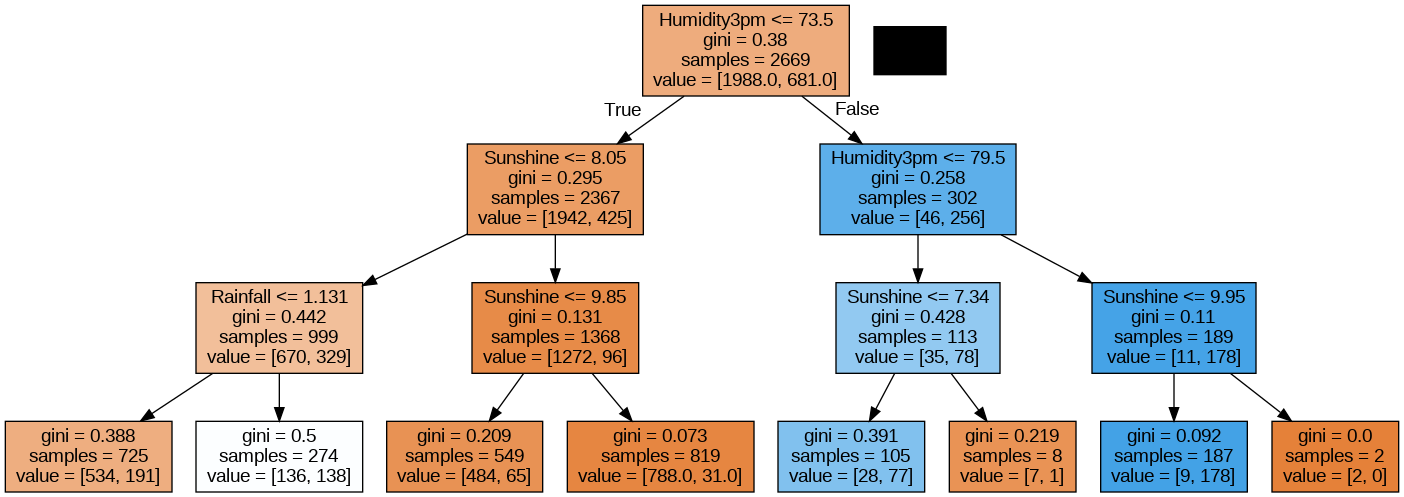

In [ ]:
graph = pydotplus.graph_from_dot_data(dot_data) # This code generates a visual representation of the decision tree using pydotplus and displays it as an image in the notebook.
Image(graph.create_png())

# **Controlling Tree growth**

To control the growth of a decision tree and prevent overfitting, you can use several parameters:

#### Maximum Depth
- **Limits Tree Complexity**: Prevents the tree from becoming too deep and complex.

#### Minimum Samples per Split
- **Prevents Fine Splits**: Ensures that a node must have a minimum number of samples before it can be split.

#### Minimum Samples per Leaf
- **Prevents Sparse Leaves**: Ensures that each leaf node has a minimum number of samples.

#### Maximum Number of Features
- **Reduces Variance**: Limits the number of features to consider at each split, reducing variance and preventing overfitting.

### Uses

- **Prevents Overfitting**: Helps in balancing model complexity and preventing overfitting.
- **Improves Generalization**: Ensures that the model generalizes well to new, unseen data.
- **Enhances Interpretability**: By controlling tree growth, you can make the model more interpretable and easier to understand.


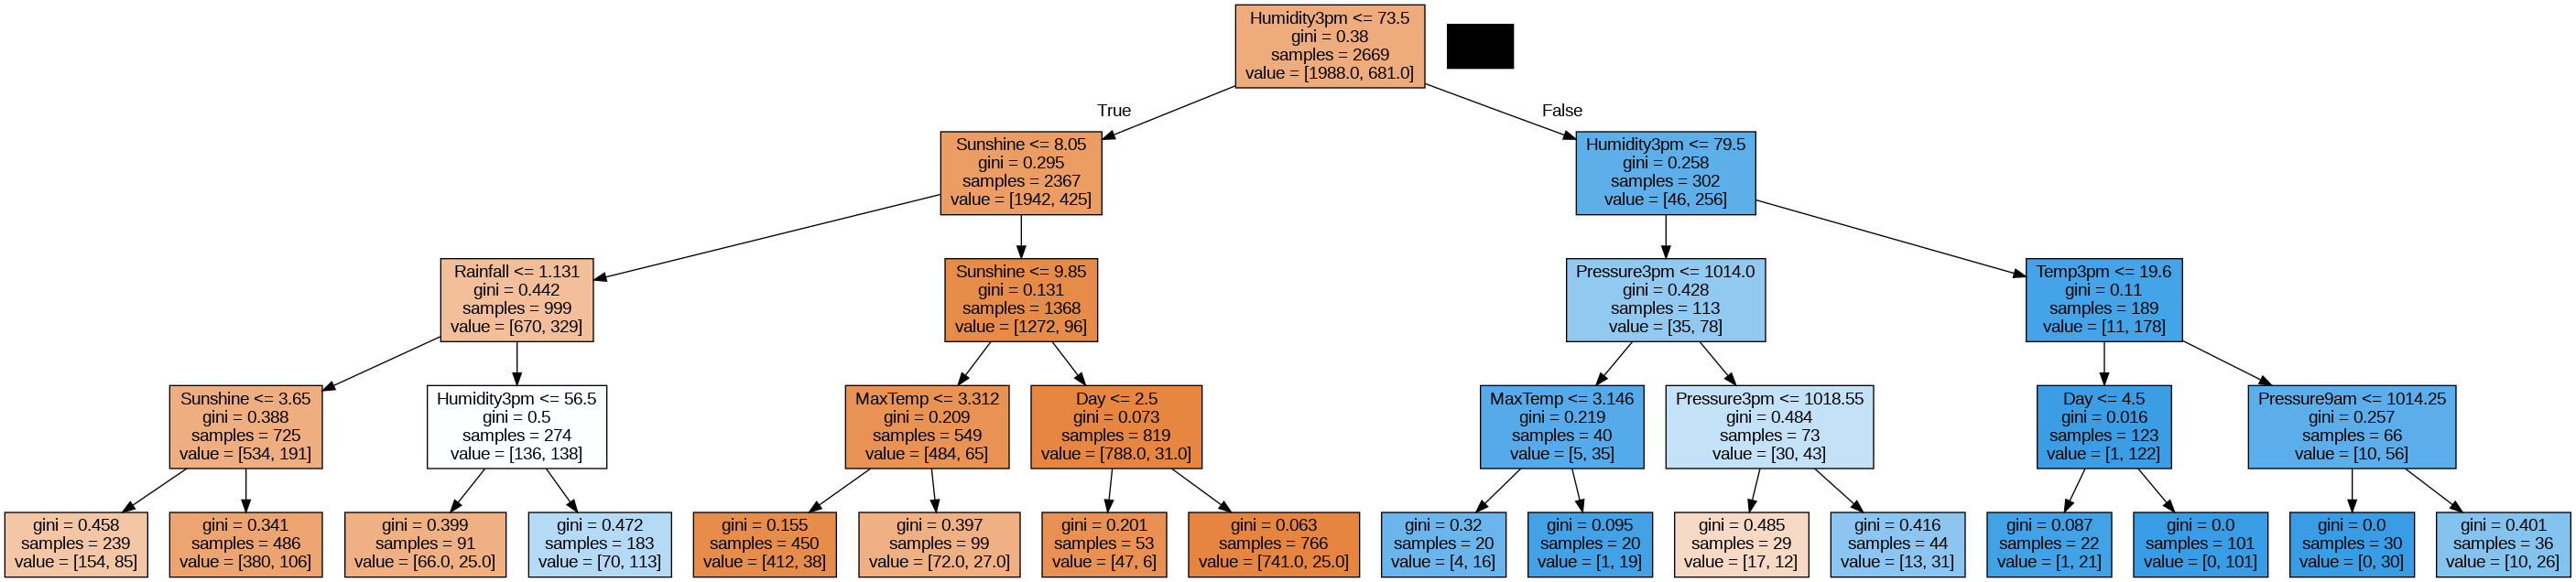

In [ ]:
clftree2 = tree.DecisionTreeClassifier(max_depth = 4,min_samples_leaf=20) # Training a decision tree classifier with a maximum depth of 4 and a minimum of 20 samples per leaf.
clftree2.fit(X_train, y_train)
dot_data = tree.export_graphviz(clftree2,out_file=None,feature_names=X_train.columns,filled=True) # Exporting the decision tree structure in DOT format for visualization.
graph2 = pydotplus.graph_from_dot_data(dot_data) # Creating a graph from the DOT data.
Image(graph2.create_png()) # Displaying the decision tree as an image.

In [ ]:
accuracy_score(y_test,clftree2.predict(X_test)) # Calculating and display the accuracy score of the decision tree model on the test data.

0.8053892215568862

# **ENSEMBLE TECHNIQUE**

Uses
- **Improved Accuracy**: Ensemble techniques often lead to better predictive accuracy compared to individual models.
- **Reduced Overfitting**: By combining multiple models, ensemble techniques can reduce overfitting and improve generalization.
- **Robustness to Noise**: Ensemble methods can be more robust to noisy data and outliers.
- **Handling Imbalanced Data**: Can handle class imbalance more effectively by combining different models.

# **Bagging**

### (Bootstrap Aggregating)

Bagging is an ensemble technique used to improve the stability and accuracy of machine learning models. Here are some key points about bagging:
#### Uses

- **Reduces Variance**: Bagging helps reduce the variance of the model, leading to more stable and robust predictions.
- **Improves Generalization**: By averaging out the predictions from multiple models, bagging can improve the generalization of the model to new data.
- **Handles Noise**: Bagging can handle noisy data more effectively by reducing the impact of outliers.



In [ ]:
from sklearn import tree  # Initializing a Decision Tree Classifier
clftree = tree.DecisionTreeClassifier()

In [ ]:
from sklearn.ensemble import BaggingClassifier # Importing the BaggingClassifier class from scikit-learn for bagging ensemble learning.

In [ ]:
from sklearn.ensemble import BaggingClassifier # Importing the BaggingClassifier class from scikit-learn for bagging ensemble learning.
bag_clf = BaggingClassifier(estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

In [ ]:
bag_clf.fit(X_train, y_train) # Train the Bagging classifier using the training data.

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=1000,
                  n_jobs=-1, random_state=42)

In [ ]:
confusion_matrix(y_test,bag_clf.predict(X_test)) # Displaying the confusion matrix for the predictions made by the trained Bagging classifier on the test data.

array([[443,  41],
       [ 80, 104]])

In [ ]:
accuracy_score(y_test,bag_clf.predict(X_test)) # Calculating and display the accuracy score of the Bagging classifier on the test data.

0.8188622754491018

# 2. **RANDOM FOREST**

Random Forest is a popular ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of predictions. Here are some key points about Random Forest:
#### Uses

- **Classification and Regression**: Random Forest can be used for both classification and regression tasks.
- **Handling High-Dimensional Data**: It can handle high-dimensional data with many features.
- **Robust to Overfitting**: Random Forest is robust to overfitting due to its ensemble nature and random feature selection.



In [ ]:
from sklearn.ensemble import RandomForestClassifier # Importing the RandomForestClassifier class from scikit-learn for random forest classification.

n_job = -1 because we want the full potential of the machine

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42) # Initializing a Random Forest classifier with 1000 decision trees.

In [ ]:
rf_clf.fit(X_train, y_train) # Trains the Random Forest classifier using the training data.

RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [ ]:
confusion_matrix(y_test,rf_clf.predict(X_test)) # Displaying the confusion matrix for the predictions made by the trained Random Forest classifier on the test data.

array([[449,  35],
       [ 84, 100]])

In [ ]:
accuracy_score(y_test,rf_clf.predict(X_test)) # Calculating and displaying the accuracy score of the trained Random Forest classifier on the test data.

0.8218562874251497

# **Grid Search**

Grid Search is a hyperparameter tuning technique used to find the optimal combination of hyperparameters for a machine learning model. Here are some key points about Grid Search:

#### Uses

- **Hyperparameter Tuning**: Grid Search is used to tune hyperparameters to optimize model performance.
- **Model Selection**: It can be used to compare different models by tuning their hyperparameters and selecting the best one.
- **Robust Evaluation**: Cross-validation ensures that the evaluation is robust and not biased by a single split of the data.



In [ ]:
from sklearn.model_selection import GridSearchCV # Used for hyperparameter tuning of a model (e.g., KNN) to find the best combination of parameters.

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300], # Number of trees in the forest
    'max_depth': [None, 5, 10], # Maximum depth of the tree
    'min_samples_split': [2, 5], # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 5], # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

In [ ]:
rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1) # Initializing a Random Forest classifier
grid_search.fit(X_train, y_train) # The fit() method runs the training process, exploring the hyperparameter space

print("Best Parameters:", grid_search.best_params_) # This line retrieves the best hyperparameters found during the grid search.
print("Best Cross-Validation Score:", grid_search.best_score_) # Performing grid search with cross-validation to find the best hyperparameters for the Random Forest classifier.

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.8445172895981337


In [ ]:
best_model = grid_search.best_estimator_ # This line assigns the best estimator (model) found during the grid search to the variable 'cvrf_clf'.
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)

Test Accuracy: 0.8263473053892215


In [ ]:
cvrf_clf = best_model # Assign best_model to cvrf_clf
confusion_matrix(y_test, cvrf_clf.predict(X_test))

array([[455,  29],
       [ 87,  97]])

# **BOOSTING**

Boosting is an ensemble learning technique used to improve the performance of machine learning models by combining multiple weak models. Here are some key points about boosting:

#### Uses

- **Classification and Regression**: Boosting can be used for both classification and regression tasks.
- **Handling Weak Models**: It combines multiple weak models to create a strong predictive model.
- **Improving Accuracy**: Boosting can significantly improve the accuracy of predictions by reducing bias and variance.



# 1. **GRADIENT BOOSTING**
Gradient Boosting is an ensemble learning technique that combines multiple weak models to create a strong predictive model. It uses gradient descent to minimize the loss function.


#### Uses of Gradient Boosting

- **Regression Tasks**: Predicting continuous outcomes such as house prices, stock prices, or energy consumption.
- **Classification Tasks**: Classifying data into categories such as spam vs non-spam emails, fraud detection in transactions, or medical diagnosis.
- **Feature Selection**: Identifying important features through feature importance scores provided by many implementations.
- **Handling Missing Data**: Some implementations can handle missing data more robustly than other algorithms.
- **Handling Non-linear Relationships**: Captures complex non-linear relationships between variables due to its ensemble nature and use of decision trees as base learners.
- **Hyperparameter Tuning**: Often used in hyperparameter tuning processes because it provides good performance with careful tuning of parameters like learning rate, number of estimators, and tree depth.


In [91]:
from sklearn.ensemble import GradientBoostingClassifier # Importing GradientBoostingClassifier for gradient boosting classification.

In [92]:
gbc_clf = GradientBoostingClassifier() # Initializing a Gradient Boosting Classifier model.
gbc_clf.fit(X_train, y_train) # Training the Gradient Boosting Classifier model using the training data (X_train, y_train).

GradientBoostingClassifier()

In [93]:
accuracy_score(y_test, gbc_clf.predict(X_test))

0.8278443113772455

In [94]:
gbc_clf2 = GradientBoostingClassifier(learning_rate=0.02, n_estimators=1000, max_depth=1)
gbc_clf2.fit(X_train, y_train) # Training the Gradient Boosting Classifier model using the training data (X_train, y_train).

GradientBoostingClassifier(learning_rate=0.02, max_depth=1, n_estimators=1000)

In [95]:
accuracy_score(y_train,gbc_clf2.predict(X_train)) # Calculating and display the accuracy score of the Gradient Boosting Classifier model on the training data.

0.8482577744473586

In [96]:
accuracy_score(y_test,gbc_clf2.predict(X_test)) # Calculating and display the accuracy score of the Gradient Boosting Classifier model on the test data.

0.8413173652694611

In [97]:
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5], # Lower learning rates can lead to more accurate models but may require more iterations.
    'n_estimators': [50, 100, 200], # Increasing this parameter can improve the model's performance but also increases computational cost.
    'max_depth': [3, 5, 7], # Deeper trees can capture more complex relationships but may lead to overfitting.
    'min_samples_split': [2, 5], # The minimum number of samples required to split an internal node.
    'min_samples_leaf': [1, 5], # Similar to min_samples_split, higher values prevent fitting noise but may underfit if set too high.
    'subsample': [0.5, 0.8, 1], # Values less than 1 can help prevent overfitting by reducing variance.
    'max_features': ['sqrt', 'log2'] # 'sqrt' means using the square root of the total number of features; 'log2' means using log2 of the total number of features.
}

In [98]:
gbc = GradientBoostingClassifier(random_state=42) # Initialize a Gradient Boosting Classifier with a random state for reproducibility
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, n_jobs=-1) # Defining the hyperparameter grid search using GridSearchCV
grid_search.fit(X_train, y_train) # Fit the GridSearchCV object to the training data

print("Best Parameters:", grid_search.best_params_) # Print the best hyperparameters found by GridSearchCV
print("Best Cross-Validation Score:", grid_search.best_score_) # Print the best cross-validation score

Best Parameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 0.5}
Best Cross-Validation Score: 0.8362747784781218


In [99]:
best_model = grid_search.best_estimator_ # This line assigns the best estimator (model) found during the grid search to the variable 'cvrf_clf'.
y_pred = best_model.predict(X_test) # This line uses the best model to make predictions on the test data.
accuracy = accuracy_score(y_test, y_pred)# This line computes how well the predicted labels match the actual labels in the test set.
print("Test Accuracy:", accuracy)  # This line displays the calculated accuracy, giving you an idea of how well your model generalizes to unseen data.

Test Accuracy: 0.844311377245509


# 2. **ADA BOOST**

AdaBoost, short for Adaptive Boosting, is a popular machine learning algorithm that combines multiple weak classifiers to create a strong classifier. It is an ensemble learning method that iteratively trains and combines multiple models, with each subsequent model focusing on the errors of the previous one.

#### Uses of AdaBoost

- **Classification Tasks**: Effective in binary and multi-class classification problems.
- **Handling Imbalanced Data**: Can handle datasets with imbalanced classes by adjusting sample weights.
- **Feature Selection**: Some implementations provide feature importance scores.
- **Robustness to Noise**: Can be robust against noisy data due to its adaptive weighting mechanism.


In [83]:
from sklearn.ensemble import AdaBoostClassifier # Importing the AdaBoostClassifier class from scikit-learn for AdaBoost ensemble learning.

In [84]:
ada_clf = AdaBoostClassifier(learning_rate=0.02, n_estimators=5000) # Training an AdaBoost classifier with a learning rate of 0.02 and 5000 estimators using the training data.
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(learning_rate=0.02, n_estimators=5000)

In [85]:
from sklearn.metrics import accuracy_score # Importing the accuracy_score function for evaluating model performance.

accuracy_score(y_train,ada_clf.predict(X_train)) # Calculating and display the accuracy score of the AdaBoost Classifier model on the training data.

0.8583739228175347

In [86]:
accuracy_score(y_test,ada_clf.predict(X_test)) # Calculating and display the accuracy score of the AdaBoost Classifier model on the testing data.

0.8398203592814372

In [87]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Define and train the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Adjust parameters as needed
rf_clf.fit(X_train, y_train)

# Now use rf_clf as the base estimator for AdaBoostClassifier
ada_clf2 = AdaBoostClassifier(rf_clf, learning_rate=1.5, n_estimators=200)
ada_clf2.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=RandomForestClassifier(random_state=42),
                   learning_rate=1.5, n_estimators=200)

In [88]:
accuracy_score(y_test,ada_clf2.predict(X_test)) # Calculating and display the accuracy score of the AdaBoost Classifier model (with a Random Forest base estimator) on the test data.

0.8368263473053892

# 3. **XG BOOST**

XGBoost, short for Extreme Gradient Boosting, is an optimized distributed gradient boosting library designed to be highly efficient, flexible, and portable. It is an implementation of the gradient boosting framework and is widely used in machine learning competitions and industry applications.

#### Uses of XGBoost

- **Regression Tasks**: Predicting continuous outcomes like house prices or stock prices.
- **Classification Tasks**: Classifying data into categories such as spam vs non-spam emails or medical diagnosis.
- **Feature Selection**: Identifying important features through feature importance scores.
- **Handling Large Datasets**: Efficiently handles large datasets due to its parallel processing capabilities.
- **Hyperparameter Tuning**: Often used in hyperparameter tuning processes due to its robust performance with careful parameter tuning.


In [69]:
import xgboost as xgb # Importing the xgboost library for gradient boosting with support for parallel processing.

In [70]:
xgb_clf = xgb.XGBClassifier(max_depth=5, n_estimators=10000, learning_rate=0.3, n_jobs=-1) # Initializing an XGBoost classifier with specified hyperparameters

In [71]:
xgb_clf.fit(X_train, y_train) # Training the XGBoost classifier using the training data (X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10000, n_jobs=-1,
              num_parallel_tree=None, random_state=None, ...)

In [73]:
from sklearn.metrics import accuracy_score # Importing the accuracy_score function from scikit-learn's metrics module.
accuracy_score(y_test,xgb_clf.predict(X_test)) # Calculating and display the accuracy score of the XGBoost classifier on the test data.

0.8203592814371258

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

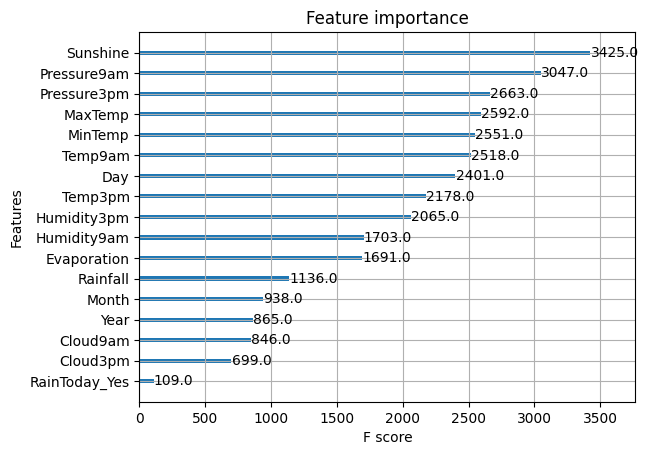

In [74]:
xgb.plot_importance(xgb_clf) # Plotting the feature importance of the XGBoost model.

In [75]:
xgb_clf = xgb.XGBClassifier( n_estimators=250, learning_rate=0.1, random_state= 42) # Initializing an XGBoost classifier with specified hyperparameters

In [76]:
param_test1 = {
    'max_depth': range(3,10,2),
    'gamma': [0.1,0.2,0.3],
    'subsample': [0.8,0.9],
    'colsample_bytree': [0.8,0.9],
    'reg_alpha': [1e-2, 0.1, 1]
} # Defining a parameter grid for hyperparameter tuning of an XGBoost model.

In [78]:
from sklearn.model_selection import GridSearchCV # Importing the GridSearchCV class
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_test1,n_jobs=-1, cv=5, scoring="accuracy") # Performing grid search to find best hyperparameters for XGBoost model

In [79]:
grid_search.fit(X_train, y_train) # Fitting the grid search to the training data

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, m...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=250,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='accuracy')

In [80]:
cvxg_clf = grid_search.best_estimator_ # Assigning the best estimator (model) found during the grid search to the variable 'cvxg_clf'.

In [81]:
accuracy_score(y_test, cvxg_clf.predict(X_test)) # Calculating and display the accuracy score of the XGBoost classifier with tuned hyperparameters on the test data.

0.8308383233532934

In [82]:
grid_search.best_params_ # Retrieving the best hyperparameters found during the grid search.

{'colsample_bytree': 0.9,
 'gamma': 0.1,
 'max_depth': 3,
 'reg_alpha': 0.1,
 'subsample': 0.8}

# **Task**

# **1. Views about the Problem Statement**

The task given is to predict whether it will rain tomorrow using weather-related features, making it a binary classification problem. Predicting weather, especially rainfall, is challenging since it involves a lot of variability. However, with the right machine learning techniques, patterns in past data can be identified to make reasonably accurate predictions.

For The Daily Buzz, this prediction is essential because the Weather Oracle column aims to provide accurate forecasts to the readers. By delivering reliable weather forecasts, the newspaper will gain more engagement and readership. Weather forecasts influence many aspects of daily life, such as planning events, farming, and managing travel schedules. Therefore, this model needs to be dependable, ensuring that predictions are not only accurate but also consistent.

I framed this task as a classification problem because the output is a binary outcome: Rain Tomorrow (Yes). Given the available data (temperature, humidity, pressure, etc.), my goal was to select the most appropriate models, preprocess the data thoroughly, and choose the best-performing one. Understanding the challenge and ensuring the model performs well was crucial to achieving the objective of accurate rainfall prediction.

# **2. Approach to Solving the Task**

The approach to building the rainfall prediction model consisted of several key phases, each aimed at ensuring a robust and effective solution:

Data Collection and Preprocessing

The foundation of any successful machine learning project lies in the quality of the data. For this project, I utilized a comprehensive dataset containing weather information for Sydney spanning from 2008 to 2017. The preprocessing stage involved several crucial steps:

	•	Handling Missing Values: Missing values can significantly impact model performance. I carefully analyzed the dataset for missing entries, employing strategies like mean imputation for numerical variables, which helped retain as much information as possible. In instances where records had excessive missing values, I chose to remove them to maintain data integrity.
	•	Creating Dummy Variables: Many machine learning algorithms require numerical input. To convert categorical features such as ‘Location’ into a format suitable for modeling, I utilized one-hot encoding to create dummy variables. This step was essential in ensuring that the model could learn from all relevant features without bias.
	•	Date Conversion: The ‘Date’ column was converted to a datetime format, allowing me to extract additional time-based features, such as year, month, and day. These features are vital as they can introduce seasonality and trends, which are particularly relevant in weather prediction.

Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) plays a pivotal role in understanding the dataset. During this phase, I employed visualizations using the Seaborn library to uncover insights into relationships between variables:

	•	Visualizing Key Variables: I plotted various graphs to investigate key relationships, such as the correlation between temperature, humidity, and rainfall. This visual exploration helped in understanding how these variables interact and influence rainfall, guiding further feature selection.
	•	Identifying Outliers and Skewness: EDA revealed outliers in several key variables, including rainfall and temperature. Identifying these outliers was crucial as they could distort model predictions. I also assessed the distribution of the rainfall variable and identified skewness, necessitating further transformation to enhance model performance.

Data Treatment

With insights gained from EDA, I implemented data treatment strategies:

	•	Outlier Treatment: I addressed the identified outliers by employing techniques such as Winsorization, where extreme values were capped to reduce their impact on model training without discarding valuable data.
	•	Skewness Treatment: To normalize the skewed distribution of rainfall and temperature features, I applied logarithmic transformations. This adjustment facilitated better model learning by ensuring that the feature distributions were more Gaussian-like.

Model Development

After preparing the dataset, I split it into training and testing sets to evaluate the performance of various classification models systematically. I began with simpler models, gradually moving towards more complex ensemble techniques:

	•	Logistic Regression: As a baseline model, logistic regression provided insights into the fundamental relationships within the data. I achieved a precision score of 0.71068, indicating a good ability to predict positive cases, along with a recall score of 0.55375, which suggested room for improvement in capturing all actual positives. The ROC AUC score of 0.7374 indicated a reasonable performance in distinguishing between the classes.
	•	Linear Discriminant Analysis (LDA): This model provided a more refined classification approach, yielding an impressive accuracy score of 0.81886 on the test data. The improvement over logistic regression suggested that LDA effectively captured the underlying class distributions.
	•	K-Nearest Neighbors (KNN): KNN is a non-parametric method that classifies data based on the proximity to training examples. My initial implementation resulted in an accuracy score of 0.7395. This model performed adequately but highlighted the importance of feature scaling.
	•	KNN with Grid Search: To optimize KNN, I employed grid search to fine-tune hyperparameters, which improved the accuracy to 0.7814, showcasing the effectiveness of systematic hyperparameter tuning.

Decision Tree Model

	•	Decision Tree Classifier: This model provided an intuitive representation of decision-making processes and achieved an accuracy score of 0.8024. The decision tree’s visual nature allowed for easy interpretation of how various features influenced predictions, although it demonstrated a tendency to overfit.

Ensemble Techniques

Recognizing the power of ensemble methods to improve predictive performance, I explored several advanced models:

	•	Bagging with Random Forest: This approach, which combines multiple decision trees, yielded an accuracy score of 0.8219 on the test data. Random Forest’s ability to reduce variance through averaging made it a strong contender.
	•	Random Forest with Grid Search: I further refined the Random Forest model through hyperparameter optimization, achieving an improved accuracy score of 0.8263. This tuning emphasized the significance of adjusting model parameters to enhance performance.
	•	Gradient Boosting: This technique excels in building trees sequentially, where each new tree corrects errors made by the previous ones. My initial implementation yielded an accuracy score of 0.8278, which improved to 0.8413 after rigorous grid search tuning, making it one of the top-performing models.
	•	AdaBoost: The first model yielded an accuracy score of 0.8398, while a second iteration showed an accuracy of 0.8368. AdaBoost’s ability to adjust weights based on misclassification proved beneficial, though it demonstrated variability across iterations.
	•	XGBoost: This highly optimized gradient boosting method produced an accuracy score of 0.8204, which improved to 0.8308 after grid search. XGBoost’s performance is often superior due to its efficiency and capability to handle large datasets.



# **3. Available Machine Learning Models and Results**

The project involved exploring a variety of machine learning models tailored for classification tasks, including:

	•	Logistic Regression: A straightforward model often used as a benchmark for binary classification tasks, providing interpretable coefficients that indicate the influence of each feature.
	•	K-Nearest Neighbors (KNN): A distance-based algorithm that classifies instances based on the majority label of the closest data points. While easy to implement, it can suffer from high computational costs with larger datasets.
	•	Linear Discriminant Analysis (LDA): A model that seeks to find a linear combination of features that best separates two or more classes, particularly effective when the classes have different covariance structures.
	•	Decision Trees: A versatile model that splits data based on feature values, providing a clear path for making predictions. While interpretable, decision trees can easily overfit if not properly pruned.
	•	Ensemble Methods:
	•	Random Forest: Combines the predictions of multiple decision trees to improve accuracy and robustness against overfitting, making it suitable for high-dimensional data.
	•	Gradient Boosting: Sequentially builds trees, each focusing on correcting the errors of the previous one. This model often excels in performance but requires careful tuning to avoid overfitting.
	•	AdaBoost: An ensemble technique that adjusts weights on misclassified instances, allowing subsequent classifiers to focus on difficult cases.
	•	XGBoost: A highly efficient implementation of gradient boosting that incorporates regularization techniques to prevent overfitting and improve model performance.


# **4. Best Model Performance and Reasons**

The model that demonstrated the best performance was **Gradient Boosting**, achieving an accuracy score of **0.8443** after hyperparameter tuning with grid search. Several factors contributed to its superior performance:

	•	Sequential Learning: Gradient Boosting constructs trees sequentially, where each tree attempts to correct the errors of its predecessors. This adaptive approach allows the model to learn complex patterns effectively.
	•	Robustness to Overfitting: By tuning hyperparameters such as the learning rate and tree depth, Gradient Boosting can maintain high accuracy without succumbing to overfitting, making it well-suited for diverse datasets.
	•	Flexibility with Feature Interactions: This model can capture non-linear relationships and interactions between features, which are often present in weather data, leading to more accurate predictions.

# **5. Further Steps to Enhance Model Performance**

To further enhance the performance of the selected Gradient Boosting model, I would consider the following strategies:

	•	Advanced Hyperparameter Tuning: While I utilized grid search for hyperparameter optimization, implementing more sophisticated techniques such as Random Search, Bayesian Optimization, or even automated tools like Optuna could yield better hyperparameter combinations. These methods can explore a broader range of values more efficiently, potentially discovering configurations that lead to improved accuracy.
	•	Enhanced Feature Engineering: Creating additional features based on domain knowledge can significantly improve model performance. For example:
	•	Lagged Features: Including past rainfall data (e.g., rainfall from the previous day) may capture temporal dependencies, which are crucial for weather prediction.
	•	Seasonal Indicators: Adding features to indicate seasons or significant weather events (like El Niño) can provide the model with context that enhances its predictive capabilities.
	•	Interaction Terms: Developing features that represent interactions between variables (such as humidity and temperature) can help the model capture complex relationships that influence rainfall.
	•	Model Stacking: This involves combining multiple models to create a meta-model that often performs better than individual models. For instance, I could stack the Gradient Boosting model with Random Forest and Decision Trees, using their predictions as input features for a higher-level model, such as logistic regression or another boosting method. This approach allows for capturing diverse patterns from different models, leading to improved overall accuracy.
	•	Cross-Validation: Implementing K-Fold cross-validation during the model evaluation phase can provide a more robust assessment of the model’s performance. This technique ensures that the model is evaluated on multiple subsets of the data, reducing the risk of overfitting to a particular train-test split.
	•	Addressing Class Imbalance: If the dataset exhibits class imbalance (i.e., fewer rainy days compared to non-rainy days), techniques such as SMOTE (Synthetic Minority Over-sampling Technique) or class-weight adjustments in the algorithms could improve the model’s ability to predict the minority class accurately.
	•	Ensemble of Ensemble Methods: Combining predictions from different ensemble models (like combining Random Forest, Gradient Boosting, and XGBoost) can enhance robustness. This meta-ensemble approach leverages the strengths of multiple models to improve overall predictive performance.
	•	Regularization Techniques: Implementing regularization in the Gradient Boosting model (e.g., L1 or L2 regularization) can help reduce overfitting by penalizing large coefficients, ensuring that the model generalizes better to unseen data.
	•	Hyperparameter Selection for Boosting Algorithms: Each boosting method has its own set of hyperparameters (such as learning rate, number of estimators, and max depth) that require careful tuning. Experimenting with these parameters, including testing different learning rates and the number of boosting rounds, can lead to improved results.
	•	Experimenting with Different Base Learners: Exploring various base learners within the ensemble framework can lead to better performance. For example, instead of using only decision trees, one could test different algorithms, such as SVM or neural networks, as base learners in boosting techniques.

By implementing these strategies, I aim to create a more robust and accurate model capable of making reliable rainfall predictions for Sydney, thereby meeting the expectations of the Daily Buzz and its readership. This continued refinement of the model is essential in the face of evolving climate patterns and the need for timely and accurate weather information.

Conclusion

Through this structured approach to problem-solving, leveraging various machine learning techniques, and refining model performance, I aim to deliver an effective rainfall prediction model that not only fulfills the objectives set by the Daily Buzz but also contributes positively to the community by enhancing public awareness and preparedness regarding weather events.
